# Fatal Police Shootings in the U.S. 2015-2017

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
import geopandas as gpd

warnings.filterwarnings('ignore')

# 1. Introduction to the data.

The dataset contains information on incidents of police shootings, encompassing various attributes such as demographics, incident details, and geographical information.

In [96]:
data = pd.read_csv('shootings.csv')
data.head(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


## 1.1 Key Features

1. **Demographics**:
   - *Age:* Range of ages for individuals involved in the incidents.
   - *Gender:* Distribution of male and female individuals.
   - *Race:* Categorical distribution based on race/ethnicity.

2. **Incident Details**:
   - *Date:* Timestamps of when the incidents occurred.
   - *Manner of Death:* Description of how the death occurred (e.g., shot, shot and Tasered).
   - *Armed:* Type of armament involved (e.g., gun, knife, unarmed).
   - *Signs of Mental Illness:* Indication of whether the individual showed signs of mental illness.
   - *Threat Level:* Level of threat perceived during the incident.
   - *Flee:* Description of whether the individual was fleeing the scene.

3. **Geographical Information**:
   - *City:* Locations where the incidents took place.
   - *State:* State-wise distribution of incidents.
   - *Latitude and Longitude:* Geospatial coordinates of the incidents.


## 1.2 Aim of the Project

The primary goal of this project is to comprehensively analyze the shootings dataset, aiming to get insights and patterns from the recorded incidents. 

Understanding the distribution of incidents across various states is a focal point, seeking to identify states with higher occurrence rates or dominance in these incidents. A crucial aspect of this analysis involves data cleaning procedures to ensure the reliability of the subsequent insights.

The primary objectives investigating potential associations between the variable 'race' and other key factors such as 'age', 'flee', and 'armed'. This exploration aims to show whether there's a relationship between race and these variables.

Additionally, this project focuses to explore a vast majority of variables within the dataset to gain a comprehensive understanding of the available information.


## 1.3 Basic Statistics About the Data

The dataset consists of 2142 records and 14 columns. Among these columns, 'id' and 'age' are the only numerical features. It's important to note the presence of missing values in some columns, indicating potential data gaps that require attention in the subsequent analysis.

The 'id' column likely represents a unique identifier for each incident, while 'age' denotes the age of the individuals involved. Exploring the distribution of ages might offer insights into the demographics of these incidents.

Other columns in the dataset might contain categorical or textual information, such as 'name', 'date', 'manner_of_death', 'armed', 'gender', 'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee', and 'body_camera'. These columns are likely to provide context and descriptive details about each incident.

In [97]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142 entries, 0 to 2141
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2142 non-null   int64  
 1   name                     2123 non-null   object 
 2   date                     2142 non-null   object 
 3   manner_of_death          2142 non-null   object 
 4   armed                    2136 non-null   object 
 5   age                      2099 non-null   float64
 6   gender                   2141 non-null   object 
 7   race                     2039 non-null   object 
 8   city                     2142 non-null   object 
 9   state                    2142 non-null   object 
 10  signs_of_mental_illness  2142 non-null   bool   
 11  threat_level             2142 non-null   object 
 12  flee                     2106 non-null   object 
 13  body_camera              2142 non-null   bool   
dtypes: bool(2), float64(1), 

# 2. Data cleaning

This section aims to uncover various insights about the dataset:

- **Identification of Missing Values:** Are there any missing values present in the dataset?
- **Handling Missing Values:** How should we address and manage these missing values?
- **Detection of Duplicates:** Are there any duplicate entries within the dataset?
- **Exploration of Notable Patterns:** Are there any other significant observations or patterns to note?

In the previous section, we examined the data types of columns within our dataset. Notably, while there exists a 'date' column, it lacks the appropriate date data type. We'll proceed to rectify this by creating one:

In [98]:
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

We can see that 'date' column now is in datetime64 data type.

In [99]:
print(data['date'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 2142 entries, 0 to 2141
Series name: date
Non-Null Count  Dtype         
--------------  -----         
2142 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 16.9 KB
None


Our dataset spans from the early months of 2015 to the beginning of 2017, encompassing the recorded incidents during this period.

In [100]:
print(data.date.min())
print(data.date.max())

2015-01-02 00:00:00
2017-02-28 00:00:00


## 2.1 Checking for duplicates

To search for duplicated values firstly we need to remove first column from the data as the column is unique for each row.

In [101]:
data = data.iloc[:, 1:]


duplicate_rows = data[data.duplicated()]


if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

Duplicate Rows:
                     name       date manner_of_death armed   age gender race  \
2053  Jamake Cason Thomas 2017-02-03            shot   gun  22.0      M    B   

         city state  signs_of_mental_illness threat_level flee  body_camera  
2053  Rowland    NC                    False       attack  Car        False  


We can see that there are some duplicates. To ensure data integrity and accuracy, the duplicates will be removed from the dataset.

In [102]:
data_no_duplicates = data.drop_duplicates()

print("Shape before removing duplicates:", data.shape)
print("Shape after removing duplicates:", data_no_duplicates.shape)

Shape before removing duplicates: (2142, 13)
Shape after removing duplicates: (2141, 13)


It is evident that we have removed one row from our data.

## 2.2 Checking for missing values

This section aims to offer an overview of missing values present within the dataset.

In [103]:
missing_values = data.isnull().sum()


columns_with_missing_values = missing_values[missing_values > 0]
print("Columns with Missing Values:")
print(columns_with_missing_values)

Columns with Missing Values:
name       19
armed       6
age        43
gender      1
race      103
flee       36
dtype: int64


We can see that there are quite a lot of missing values in six columns - 'name', 'armed', 'age', 'gender', 'race' and 'flee'.

Given that the subsequent sections will analyze the 'race', 'gender', 'armed', 'age', and 'flee' columns, we'll proceed by removing missing values specifically from these columns.

Regarding the 'name' variable, as it holds limited value for our forthcoming analysis, null values within this column will not be removed.

In [104]:
data_no_nulls = data_no_duplicates.dropna(subset=['race', 'armed', 'age', 'flee', 'gender'])

## 2.3 Outliers

Upon the removal of missing values and duplicates, the next step involves investigating the presence of outliers within the dataset. Notably, among the columns, 'age' stands as the only numerical column eligible to outliers, as indicated in the previous description.

In [105]:
data_no_nulls['age'].describe()

count    1985.000000
mean       36.117884
std        12.648880
min         6.000000
25%        26.000000
50%        34.000000
75%        45.000000
max        83.000000
Name: age, dtype: float64

The dataset reveals a broad age range among individuals involved in fatal shootings, with the youngest victim being a 6-year-old child and the oldest a senior of 83 years. This extensive span across ages is not uncommon, reflecting the natural diversity within a population. To visually explore this diversity, a boxplot analysis will be conducted.

Additionally, the dataset's average age of victims stands at approximately 36 years, providing a central tendency within this wide-ranging dataset.


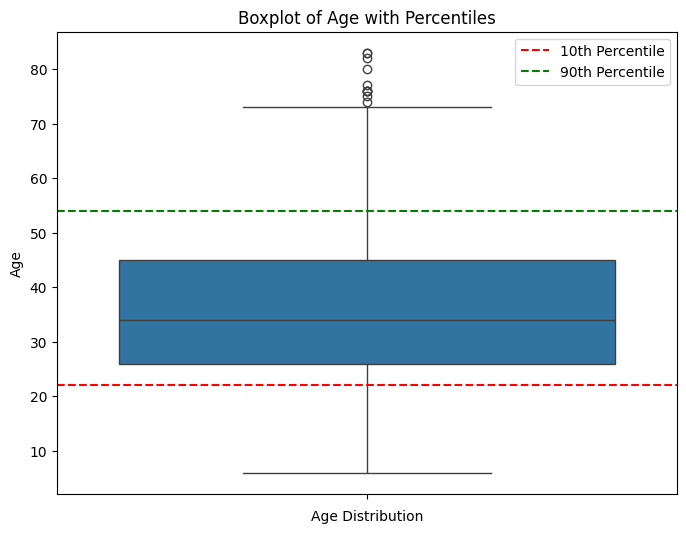

In [106]:
percentiles = data_no_nulls['age'].quantile([0.1, 0.9])


plt.figure(figsize=(8, 6))
sns.boxplot(y='age', data=data_no_nulls, orient='h')
plt.axhline(y=percentiles[0.1], color='r', linestyle='--', label='10th Percentile')
plt.axhline(y=percentiles[0.9], color='g', linestyle='--', label='90th Percentile')
plt.title('Boxplot of Age with Percentiles')
plt.xlabel('Age Distribution')
plt.ylabel('Age')
plt.legend()
plt.show()

There are a few data points that fall outside the calculated percentiles. However, as previously noted, the age range presents typical characteristics. It's possible that a 6-year-old child and an 83-year-old senior were involved in these incidents, contributing to these outliers. Hence, no further outlier analysis will be conducted, and all observations will remain unaltered for continued analysis.

# 3. Exploratory Data Analysis (EDA)

This section dives deeper into the various columns within our dataset.

We will explore the cleaned dataset, excluding duplicates and missing values.

During our analysis, the columns 'id' and 'name' will be excluded for further investigation.


In [107]:
new_data = data_no_nulls.iloc[:, 1:]  
new_data.head(5)

,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


## 3.1 Descriptive statistics - manner of death

The bar plot below illustrates the 'manner_of_death' column, revealing two distinct categories: 'shot' and 'shot and tasered'. Notably, a significant majority of recorded deaths resulted from shooting incidents, while a smaller proportion involved the use of tasers. This observation raises interesting questions about law enforcement practices in the United States, suggesting a predominant reliance on lethal force over attempts to apprehend suspects using less lethal means.

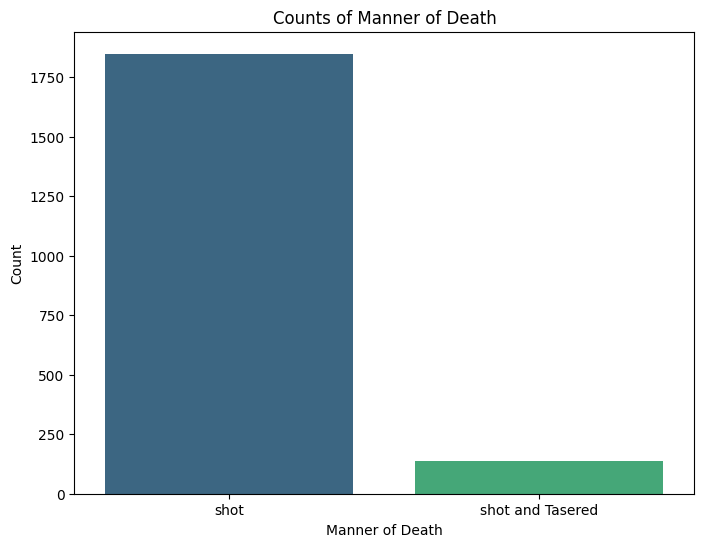

In [108]:
manner_counts = new_data['manner_of_death'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=manner_counts.index, y=manner_counts.values, palette='viridis')
plt.xlabel('Manner of Death')
plt.ylabel('Count')
plt.title('Counts of Manner of Death')
plt.show()

## 3.2 Descriptive statistics - armed

Before analysing 'armed' column let's look at unique categories.

In [109]:
num_unique_armed = new_data['armed'].nunique()
print(f"The 'armed' column has {num_unique_armed} unique categories.")

The 'armed' column has 61 unique categories.


In [119]:
unique_armed_categories = new_data['armed'].unique()
print("Unique categories in the 'armed' column:")
for category in unique_armed_categories:
    print(category)

Unique categories in the 'armed' column:
gun
unarmed
toy weapon
nail gun
knife
vehicle
shovel
hammer
hatchet
undetermined
sword
machete
box cutter
metal object
screwdriver
lawn mower blade
flagpole
guns and explosives
cordless drill
metal pole
Taser
metal pipe
metal hand tool
blunt object
metal stick
sharp object
meat cleaver
carjack
chain
contractor's level
unknown weapon
stapler
crossbow
bean-bag gun
baseball bat and fireplace poker
straight edge razor
gun and knife
ax
brick
baseball bat
hand torch
chain saw
garden tool
scissors
pole
pick-axe
flashlight
spear
pitchfork
hatchet and gun
rock
piece of wood
bayonet
glass shard
motorcycle
metal rake
baton
crowbar
oar
machete and gun
beer bottle


Observing the numerous categories within this variable, we aim to simplify the analysis by creating a new column named 'armed_category', consolidating outcomes into two categories: 'armed' and 'unarmed'.

Notably, a significant majority of victims were armed, potentially shedding light on the use of lethal force by law enforcement in situations where suspects were perceived as armed.

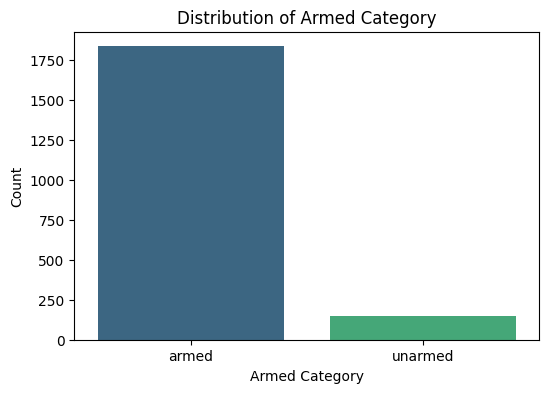

In [111]:
new_data['armed_category'] = new_data['armed'].apply(lambda x: 'unarmed' if x == 'unarmed' else 'armed')

plt.figure(figsize=(6, 4))
sns.countplot(x='armed_category', data=new_data, palette='viridis')
plt.xlabel('Armed Category')
plt.ylabel('Count')
plt.title('Distribution of Armed Category')
plt.show()

Upon plotting the 'manner_of_death' and 'armed_category' columns, one might anticipate observing a pattern where a majority of unarmed victims would also be subjected to tasering. However, the graph does not exhibit this expected trend, preventing us from drawing such a conclusion based on the visual representation.

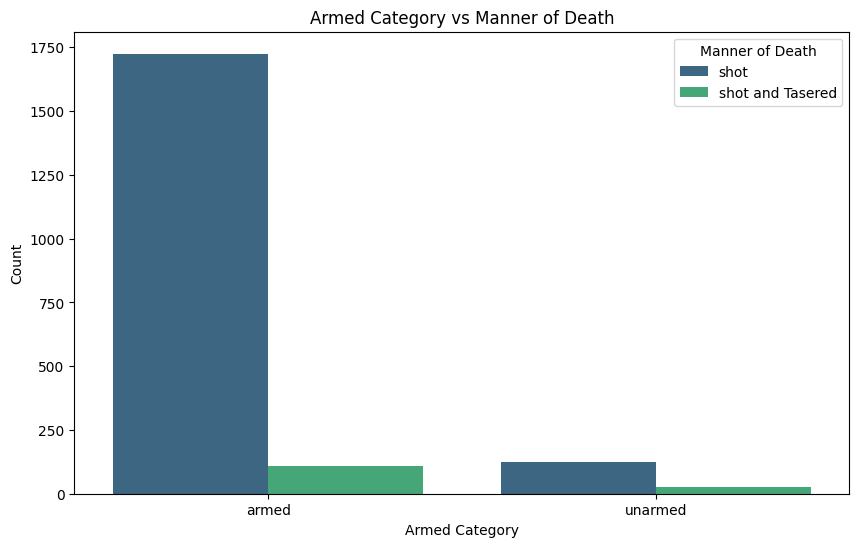

In [113]:
plt.figure(figsize=(10, 6))
sns.countplot(x='armed_category', hue='manner_of_death', data=new_data, palette='viridis')
plt.xlabel('Armed Category')
plt.ylabel('Count')
plt.title('Armed Category vs Manner of Death')
plt.legend(title='Manner of Death')
plt.show()

## 3.3 Descriptive statistics - age

Given our earlier examination of the 'age' column, the following graph doesn't present new insights. It reaffirms the observation that a majority of victims fall within the young to middle-aged bracket. Additionally, there are instances of very young and elderly victims within the dataset.


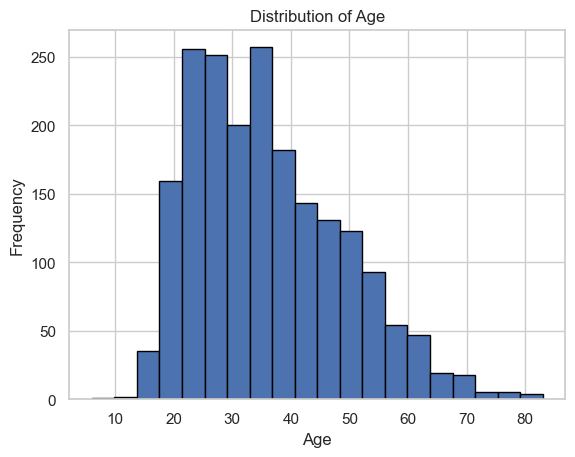

In [122]:
plt.hist(new_data['age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

## 3.4 Descriptive statistics - gender

Before examining 'gender' variable our assumption could that there will be more men victims rather than womans. 

In [114]:
gender_percentage = new_data['gender'].value_counts(normalize=True) * 100

print("Percentage of each gender:")
print(gender_percentage)

Percentage of each gender:
gender
M    95.768262
F     4.231738
Name: proportion, dtype: float64


Our previous assumption holds true. Nearly 96% of the total portfolio consists of men. This observation might suggest that men could potentially pose a greater threat to the community or potentially exhibit more aggressive behavior.

## 3.5 Descriptive statistics - signs of mental illness

'signs_of_mental_illness' is a boolean-type variable encompassing two outcomes: 'True' and 'False'.

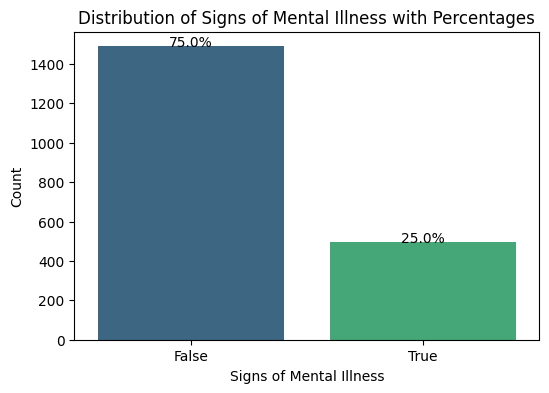

In [115]:
signs_count = new_data['signs_of_mental_illness'].value_counts()
signs_percentage = new_data['signs_of_mental_illness'].value_counts(normalize=True) * 100


plt.figure(figsize=(6, 4))
ax = sns.countplot(x='signs_of_mental_illness', data=new_data, palette='viridis')


for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.3, f"{signs_percentage[i]:.1f}%", ha="center")

plt.xlabel('Signs of Mental Illness')
plt.ylabel('Count')
plt.title('Distribution of Signs of Mental Illness with Percentages')
plt.show()

We can see that 25% of all the victims showed signs of mentall illness. This might suggest that people with mentall condition can exibit unusual behaviour.

<Figure size 1000x600 with 0 Axes>

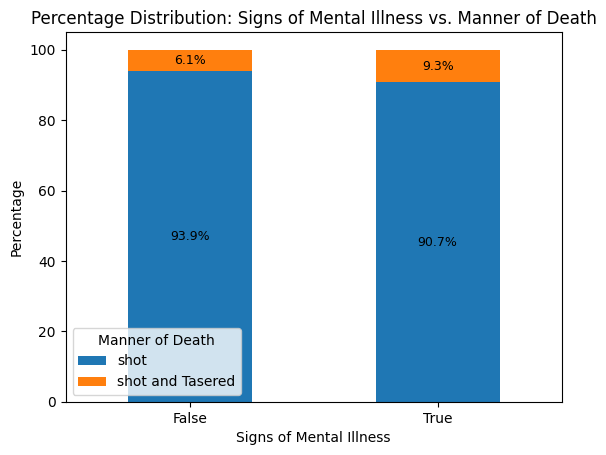

In [117]:
cross_tab = pd.crosstab(data_no_nulls['signs_of_mental_illness'], data_no_nulls['manner_of_death'], normalize='index') * 100


plt.figure(figsize=(10, 6))
ax = cross_tab.plot(kind='bar', stacked=True, rot=0)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=9)

plt.title('Percentage Distribution: Signs of Mental Illness vs. Manner of Death')
plt.xlabel('Signs of Mental Illness')
plt.ylabel('Percentage')
plt.legend(title='Manner of Death')
plt.show()

Upon examining the percentage distribution of the two variables, it's evident that a slightly higher proportion of victims showing signs of mental illness were also subjected to being tasered. This observation might suggest that the police attempted to warn the individual before resorting to lethal force when they noticed possible mental disorder.

## 3.6 Descriptive statistics - threat level

The threat level variable consists of three different categories - 'attack', 'other' and 'undetermined'.

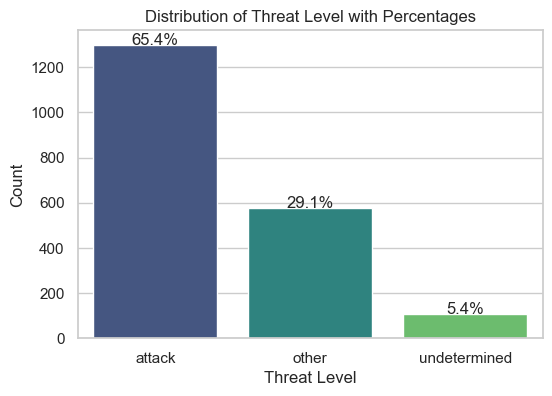

In [126]:
threat_count = new_data['threat_level'].value_counts()
threat_percentage = new_data['threat_level'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 4))
ax = sns.countplot(x='threat_level', data=new_data, palette='viridis')


for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.3, f"{threat_percentage[i]:.1f}%", ha="center")

plt.xlabel('Threat Level')
plt.ylabel('Count')
plt.title('Distribution of Threat Level with Percentages')
plt.show()

Observing the data reveals that approximately 65% of individuals exhibited aggressive behavior and attempted to attack police officers. This observation could potentially explain why a significant number of officers resorted to using solely lethal weapons in their attempts to pacify the situation with these individuals.

## 3.7 Descriptive statistics - flee

Variable shows if person tried to excape and if tried then how. 

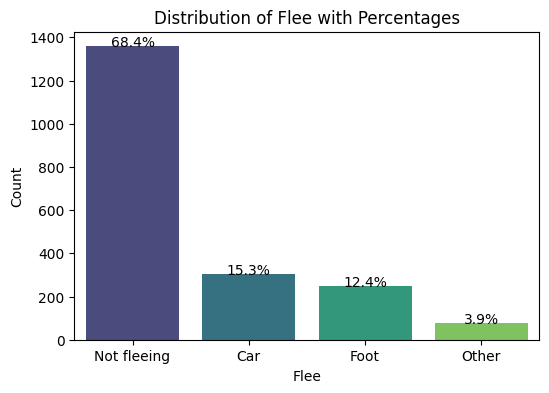

In [118]:
flee_count = new_data['flee'].value_counts()
flee_percentage = new_data['flee'].value_counts(normalize=True) * 100


plt.figure(figsize=(6, 4))
ax = sns.countplot(x='flee', data=new_data, palette='viridis')


for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.3, f"{flee_percentage[i]:.1f}%", ha="center")

plt.xlabel('Flee')
plt.ylabel('Count')
plt.title('Distribution of Flee with Percentages')
plt.show()

The data indicates that a majority of the suspects haven't attempted to flee. This observation raises the possibility that they might have intended to engage in an attack on police officers.

To verify this hypothesis, we'll create a new variable named 'flee_new' categorizing 'Not fleeing' as such and grouping all other variables as 'Fleeing'. Additionally, a new variable 'threat_level_new' will be generated, containing two categories: 'Attack' and grouping all other values as 'Not attack'.

In [119]:
data_no_nulls['flee_new'] = data_no_nulls['flee'].apply(lambda x: 'Not fleeing' if x == 'Not fleeing' else 'Fleeing')

data_no_nulls['threat_level_new'] = data_no_nulls['threat_level'].apply(lambda x: 'Attack' if x == 'attack' else 'Not attack')

print(data_no_nulls['flee_new'].value_counts())
print(data_no_nulls['threat_level_new'].value_counts())

flee_new
Not fleeing    1358
Fleeing         627
Name: count, dtype: int64
threat_level_new
Attack        1299
Not attack     686
Name: count, dtype: int64


<Figure size 800x600 with 0 Axes>

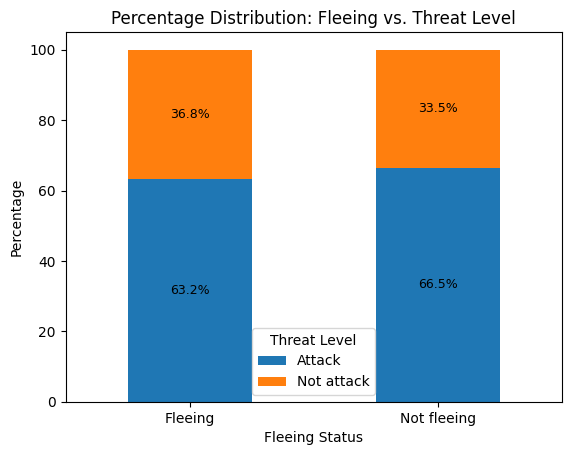

In [122]:
cross_tab = pd.crosstab(data_no_nulls['flee_new'], data_no_nulls['threat_level_new'], normalize='index') * 100


plt.figure(figsize=(8, 6))
ax = cross_tab.plot(kind='bar', stacked=True, rot=0)


for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=9)

plt.title('Percentage Distribution: Fleeing vs. Threat Level')
plt.xlabel('Fleeing Status')
plt.ylabel('Percentage')
plt.legend(title='Threat Level')
plt.show()

The table above doesn't indicate any clear tendency for not fleeing individuals to exhibit more attacks compared to those fleeing. Surprisingly, there appears to be almost no discernible difference in attack tendencies between these two groups.

## 3.8 Descriptive statistics - body camera

'body camera' variable shows if police officer had camera or not during the incident.

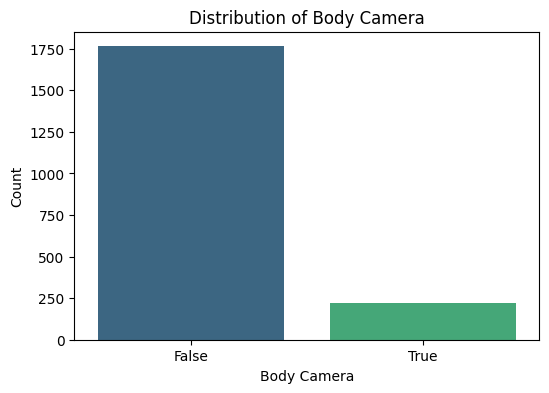

In [123]:
plt.figure(figsize=(6, 4))
sns.countplot(x='body_camera', data=new_data, palette='viridis')
plt.xlabel('Body Camera')
plt.ylabel('Count')
plt.title('Distribution of Body Camera')
plt.show()

It's apparent that the majority of officers did not have their body cameras activated. This circumstance suggests a challenge in evaluating the actions of both the police officer and the suspect. With no direct video evidence, relying solely on the officer's account might introduce bias, especially considering the fatality of the suspect involved.

## 3.9 Descriptive statistics - date

Our data consists of daily recors from 2015 Januray until 2017 February.

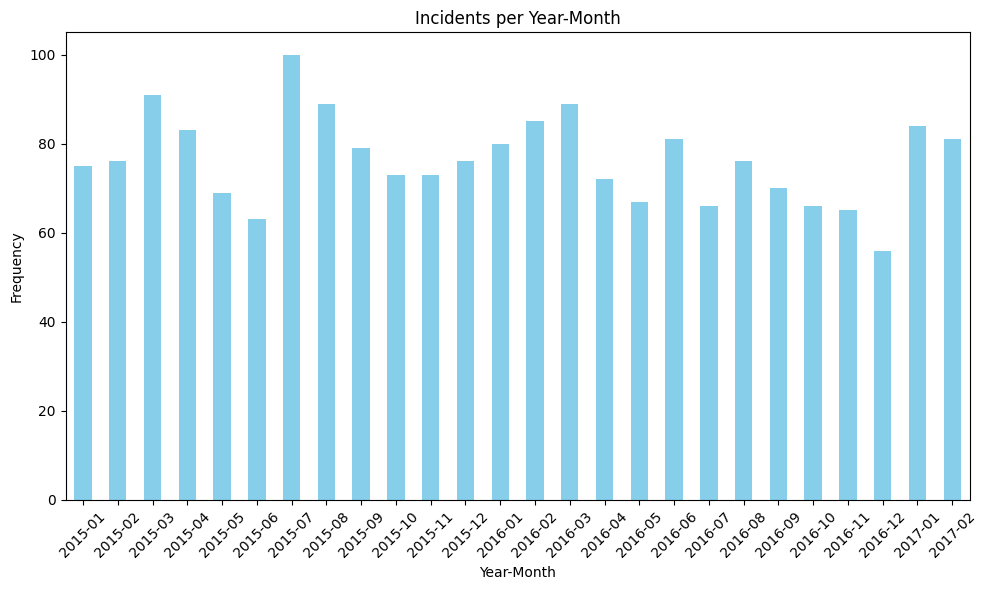

In [124]:
new_data['month'] = new_data['date'].dt.month
new_data['year'] = new_data['date'].dt.year

new_data['month_year'] = new_data['date'].dt.to_period('M')

plt.figure(figsize=(10, 6))
new_data['month_year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Year-Month')
plt.ylabel('Frequency')
plt.title('Incidents per Year-Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The graph above illustrates the monthly distribution of fatal incidents throughout the observed period. No months stand out with unusually high numbers of fatal shootings, indicating a relatively consistent occurrence of incidents across the months.

## 4. Fatal shootings in the different States

In this section we are going to analyse deeper different aspects related to US States.

We will use data after removing duplicates and missing values.

In ordet to plot geographical graphs we need additional data about US States. To create geographical graphs we need longitude and altitude. For this we have inported additional dataset called 'uscities'

In [125]:
uscities = pd.read_csv('uscities.csv')
uscities.head(5)

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36081,Queens,40.6943,-73.9249,18908608,11226.2,shape,False,True,America/New_York,1,11229 11228 11226 11225 11224 11222 11221 1122...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1141,-118.4068,11922389,3202.3,shape,False,True,America/Los_Angeles,1,91367 90291 90293 90292 91316 91311 90035 9003...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8375,-87.6866,8497759,4648.7,shape,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7840,-80.2101,6080145,4728.2,shape,False,True,America/New_York,1,33128 33129 33125 33126 33127 33149 33144 3314...,1840015149
4,Houston,Houston,TX,Texas,48201,Harris,29.7860,-95.3885,5970127,1382.2,shape,False,True,America/Chicago,1,77069 77068 77061 77060 77063 77062 77065 7706...,1840020925


From this dataset we are going to join two columns - latitude and longitude.

In [126]:
# Renaming the 'city' column in 'data' to 'city_name' to avoid confusion
data_no_nulls.rename(columns={'city': 'city_name'}, inplace=True)

# Merging 'data_no_nulls' and 'uscities' on 'state' and 'city_name' in 'data_no_nulls' and 'city' and 'state_id' in 'uscities'
merged_data = pd.merge(data_no_nulls, uscities, how='left', left_on=['state', 'city_name'], right_on=['state_id', 'city'])

# Selecting only the desired columns (latitude, longitude and state_name)
lat_lng_state = merged_data[['lat', 'lng']]

# Adding the 'lat' and 'lng' columns to the 'data_no_nulls' DataFrame
data_no_nulls[['lat', 'lng']] = lat_lng_state

In [127]:
# Assuming you have a DataFrame named 'data' containing 'city_name' and 'state' columns

# Create the new 'city_state' column by concatenating 'city_name' and 'state'
data_no_nulls['city_state'] = data_no_nulls['city_name'] + ', ' + data_no_nulls['state']

Also, in order to create interactive geographical graph we need to import US state shape information. This data is imported and visible in 'us_map'.

In [128]:
us_map = gpd.read_file('States_shapefile.shp')
us_map.head(10)

,FID,Program,State_Code,State_Name,Flowing_St,FID_1,geometry
0,1,PERMIT TRACKING,AL,ALABAMA,F,919,"POLYGON ((-85.07007 31.98070, -85.11515 31.907..."
1,2,None,AK,ALASKA,N,920,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824..."
2,3,AZURITE,AZ,ARIZONA,F,921,"POLYGON ((-114.52063 33.02771, -114.55909 33.0..."
3,4,PDS,AR,ARKANSAS,F,922,"POLYGON ((-94.46169 34.19677, -94.45262 34.508..."
4,5,None,CA,CALIFORNIA,N,923,"MULTIPOLYGON (((-121.66522 38.16929, -121.7823..."
5,6,ECOMAP,CO,COLORADO,F,924,"POLYGON ((-102.04446 37.64147, -102.04201 37.3..."
6,7,SIMS,CT,CONNECTICUT,F,925,"POLYGON ((-73.53039 41.52275, -73.51715 41.665..."
7,8,None,DE,DELAWARE,P,926,"POLYGON ((-75.70707 38.55759, -75.71071 38.649..."
8,9,None,DC,DISTRICT OF COLUMBIA,P,927,"POLYGON ((-77.00793 38.96667, -76.91090 38.890..."
9,10,None,FL,FLORIDA,P,928,"MULTIPOLYGON (((-80.78566 28.78519, -80.76242 ..."


In order to create a geographical chart short names for the states are not enough, therefore, 'state' column does not suits us. Therefore, we need to join new column called 'state_name'.

In [129]:
merged_data = pd.merge(data_no_nulls, us_map, how='left', left_on=['state'], right_on=['State_Code'])

# Selecting only the desired columns (latitude and longitude)
lat_lng = merged_data[['State_Name']]

# Adding the 'lat' and 'lng' columns to the 'data' DataFrame
data_no_nulls[['state_name']] = lat_lng

We have noticed that some columns have upper case letters. That might create some issues later on so we need to have all columns for 'us_map' in lower cases.

In [130]:
# Convert column names to lowercase
us_map.columns = map(str.lower, us_map.columns)

# Now, all column names in us_map are lowercase
print(us_map.columns)

Index(['fid', 'program', 'state_code', 'state_name', 'flowing_st', 'fid_1',
       'geometry'],
      dtype='object')


After adding additional data and performing some changes to the data sets now we can start plotting how deaths are spread among the different states.



In [131]:
import geopandas as gpd
import folium
from branca.colormap import LinearColormap

# Assuming you have the DataFrame 'data_no_nulls' with 'state_name' and 'age' columns

# Get the count of occurrences and average age for each state
state_stats = data_no_nulls.groupby('state_name')['age'].agg(['count', 'mean']).reset_index()
state_stats.columns = ['state_name', 'Occurrences', 'Average_Age']

# Merge state counts with US map data
merged_data = pd.merge(us_map, state_stats, on='state_name', how='left')

# Create a folium map centered around the US
m = folium.Map(location=[37, -102], zoom_start=4)

# Create a colormap
colormap = LinearColormap(['green', 'yellow', 'red'], vmin=merged_data['Occurrences'].min(), vmax=merged_data['Occurrences'].max())

# Add states to the map with colors based on occurrences
for idx, row in merged_data.iterrows():
    state_occurrences = row['Occurrences']
    average_age = row['Average_Age']
    color = colormap(state_occurrences)
    tooltip_text = f"{row['state_name']}<br>Killings: {state_occurrences}<br>Age: {average_age:.1f}"
    folium.GeoJson(
        row['geometry'],
        style_function=lambda x, fill_color=color: {
            'fillColor': fill_color,
            'color': 'black',
            'weight': 1,
            'fillOpacity': 0.6
        },
        tooltip=tooltip_text
    ).add_to(m)

# Display the map
m

The interactive geographical plot gives a possibility to explore different US states quickly. The graph shows how many people were killed and what was their average age.

5. ## Race in fatal shootings data

In US the opinion that black people are more often a victim compared to other races. This section will try to explore if we can see a pattern that black person is a more often victim of police fatal shootings.

'Race' column consists of 6 different categories:
1. W - white person.
2. B - black person.
3. H - hispanic person.
4. A - asian person.
5. O - other race.
6. N - natvie american person.

Let's see how races are distributed.

In [72]:
# Count occurrences of each race
race_counts = data_no_nulls['race'].value_counts()

# Display the count of each race
print(race_counts)

race
W    1022
B     522
H     355
A      32
O      28
N      26
Name: count, dtype: int64


After a basic count of 'race' variable we immediately can see that there are two times more dead white race people compared to black.

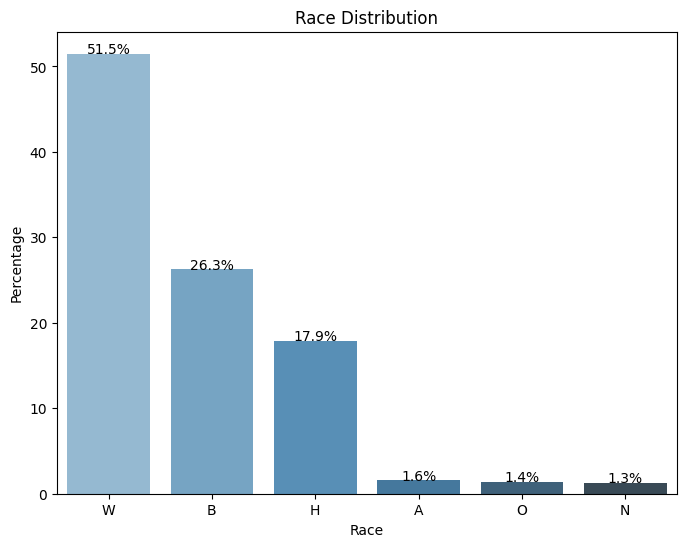

In [75]:
plt.figure(figsize=(8, 6))
race_counts = data_no_nulls['race'].value_counts(normalize=True).reset_index()
race_counts.columns = ['Race', 'Percentage']
race_counts['Percentage'] *= 100  # converting decimal to percentage

bar_plot = sns.barplot(x='Race', y='Percentage', data=race_counts, palette='Blues_d')
plt.title('Race Distribution')
plt.xlabel('Race')
plt.ylabel('Percentage')

# Adding percentages on top of each bar
for index, row in race_counts.iterrows():
    bar_plot.text(index, row['Percentage'], f'{row["Percentage"]:.1f}%', color='black', ha="center")

plt.show()

After looking at the barplot we can see that 51.5% of victims are white people, black people consists of 26.3% and other unfortunate race is hispanics with 17.9%. So, after looking at initial data we could say that black people are one of the race that are being shot by police, but white people are even more unfortunate.

However, we know that US population is big and the biggest part of the total population consists of white people. Below we are going to gather information about total US population and also population of each year. We are going to project how many fatal shooting deaths each race will exibit projected for 1 million people and for total population.

We will exclude 'O - other' race as we do not have enough information to understand what exact race is under this category.

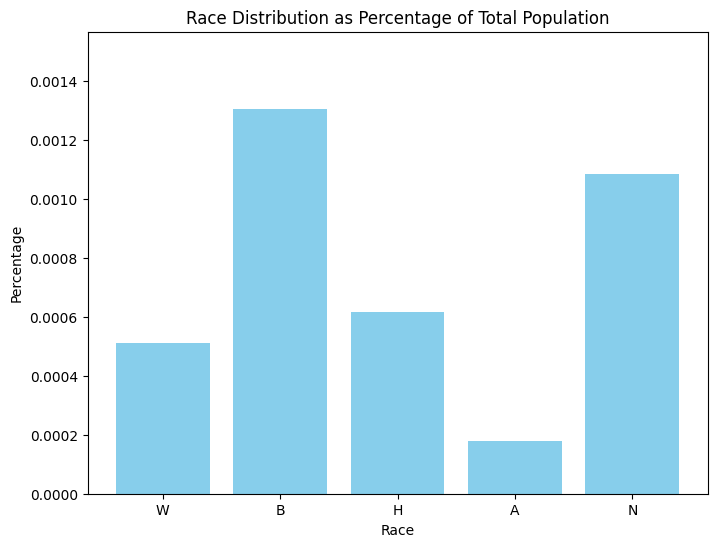

In [82]:
# Count occurrences of each race
race_counts = data_no_nulls['race'].value_counts()

# Define total population for W and B
total_population_W = 200000000
total_population_B = 40000000
total_population_H = 57500000
total_population_A = 18000000
total_population_N = 2400000

# Calculate percentages for W and B
percentage_W = (race_counts['W'] / total_population_W) * 100
percentage_B = (race_counts['B'] / total_population_B) * 100
percentage_H = (race_counts['H'] / total_population_H) * 100
percentage_A = (race_counts['A'] / total_population_A) * 100
percentage_N = (race_counts['N'] / total_population_N) * 100

race_percentages = pd.DataFrame({
    'Race': ['W', 'B', 'H', 'A', 'N'],
    'Percentage': [percentage_W, percentage_B, percentage_H, percentage_A, percentage_N]
})

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(race_percentages['Race'], race_percentages['Percentage'], color='skyblue')
plt.title('Race Distribution as Percentage of Total Population')
plt.xlabel('Race')
plt.ylabel('Percentage')
plt.ylim(0, max(race_percentages['Percentage']) * 1.2)  # Set y-axis limit for better visualization
plt.show()

To start projecting firstly we need to find what is the percentage of total population of each race were victims of fatal police shootings. When looking on race population level we can see that black (B) and native american (N) have the highest percentage of their population as victims of shootings. Now let's see how we can project shootings for 1 million people and for US total population.

In [83]:
# Count occurrences of each race
race_counts = data_no_nulls['race'].value_counts()

# Define total population for W and B
total_population_W = 200000000
total_population_B = 40000000
total_population_H = 57500000
total_population_A = 18000000
total_population_N = 2400000

total_population = 323000000

# Calculate percentages for W and B
NumberOfKillings_W = (race_counts['W'] / total_population_W) * 1000000
NumberOfKillings_B = (race_counts['B'] / total_population_B) * 1000000
NumberOfKillings_H = (race_counts['H'] / total_population_H) * 1000000
NumberOfKillings_A = (race_counts['A'] / total_population_A) * 1000000
NumberOfKillings_N = (race_counts['N'] / total_population_N) * 1000000

# Round the calculated values and convert to integers
NumberOfKillings_W = int(round(NumberOfKillings_W))
NumberOfKillings_B = int(round(NumberOfKillings_B))
NumberOfKillings_H = int(round(NumberOfKillings_H))
NumberOfKillings_A = int(round(NumberOfKillings_A))
NumberOfKillings_N = int(round(NumberOfKillings_N))

# Calculate percentages for W and B
NumberOfKillings_TotalPopulation_W = (race_counts['W'] / total_population_W) * total_population
NumberOfKillings_TotalPopulation_B = (race_counts['B'] / total_population_B) * total_population
NumberOfKillings_TotalPopulation_H = (race_counts['H'] / total_population_H) * total_population
NumberOfKillings_TotalPopulation_A = (race_counts['A'] / total_population_A) * total_population
NumberOfKillings_TotalPopulation_N = (race_counts['N'] / total_population_N) * total_population

# Round the calculated values and convert to integers
NumberOfKillings_TotalPopulation_W = int(round(NumberOfKillings_TotalPopulation_W))
NumberOfKillings_TotalPopulation_B = int(round(NumberOfKillings_TotalPopulation_B))
NumberOfKillings_TotalPopulation_H = int(round(NumberOfKillings_TotalPopulation_H))
NumberOfKillings_TotalPopulation_A = int(round(NumberOfKillings_TotalPopulation_A))
NumberOfKillings_TotalPopulation_N = int(round(NumberOfKillings_TotalPopulation_N))

# Create a DataFrame for percentages
race_killings = pd.DataFrame({
    'Race': ['W', 'B', 'H', 'A', 'N'],
    'Killings per Million': [NumberOfKillings_W, NumberOfKillings_B, NumberOfKillings_H, NumberOfKillings_A, NumberOfKillings_N],
    'Killings per Total US population': [NumberOfKillings_TotalPopulation_W, NumberOfKillings_TotalPopulation_B, NumberOfKillings_TotalPopulation_H
                                         , NumberOfKillings_TotalPopulation_A, NumberOfKillings_TotalPopulation_N]
})

# Display the DataFrame
print(race_killings)

  Race  Killings per Million  Killings per Total US population
0    W                     5                              1651
1    B                    13                              4215
2    H                     6                              1994
3    A                     2                               574
4    N                    11                              3499


If total population of each race would be equal to total US population then during span of two years 4215 black people would have been killed. Compared to other races asians has the least amount of projected deaths with 574. 

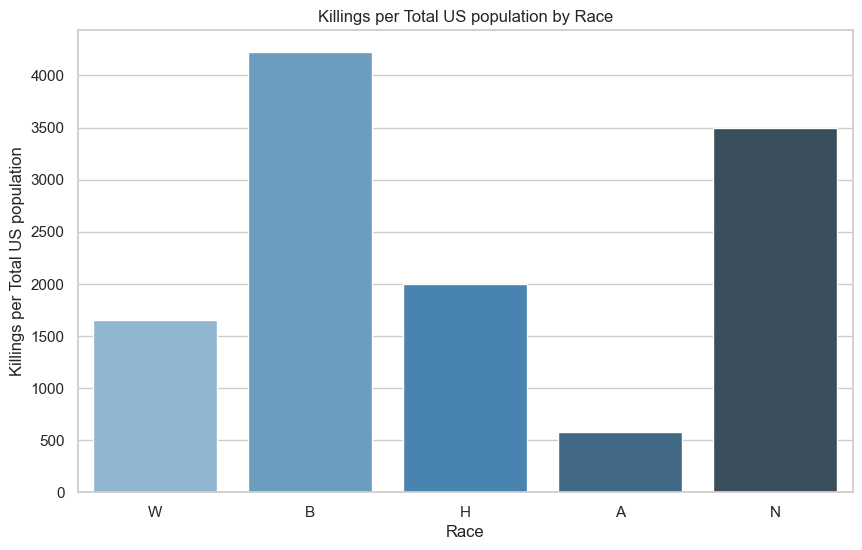

In [11]:
# Plotting the bar plot using seaborn
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(data=race_killings,  x='Race', y='Killings per Total US population', palette='Blues_d')
plt.xlabel('Race')
plt.ylabel('Killings per Total US population')
plt.title('Killings per Total US population by Race')
plt.show()

Looking at the graph it is evident that Black citizens are being killed at much higher rate than any other race in the US. Death rate is almost three times higher than for white citizens. We can also see that native americans are also killed quite frequently.

### 5.1 Race and Age

This section will try to look at race and age variables. We have already looked at age variable previously, so let's get some insights when comparing to race.



In [84]:
# Calculate average age for each race
average_age_by_race = data_no_nulls.groupby('race')['age'].mean().reset_index()

print("Average Age by Race:")
print(average_age_by_race)

Average Age by Race:
  race        age
0    A  37.562500
1    B  31.538314
2    H  32.929577
3    N  31.576923
4    O  33.071429
5    W  39.718200


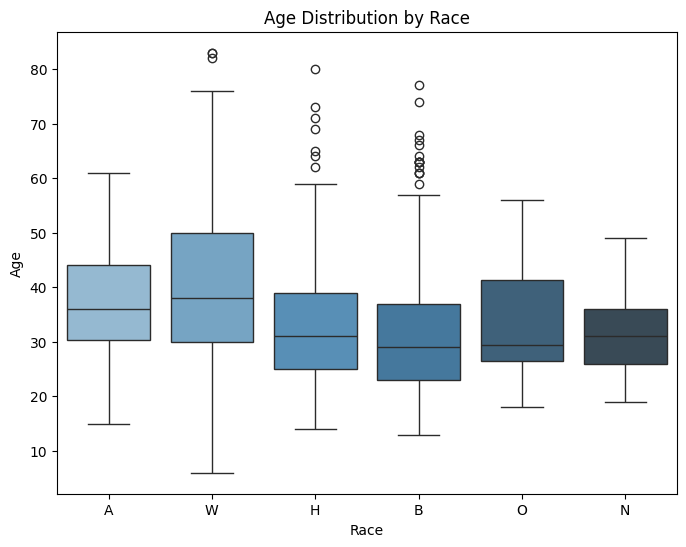

In [86]:
# Boxplot of age and race
plt.figure(figsize=(8, 6))
sns.boxplot(x='race', y='age', data=data_no_nulls, palette='Blues_d')
plt.title('Age Distribution by Race')
plt.xlabel('Race')
plt.ylabel('Age')
plt.show()

### 5.2 Race and armed

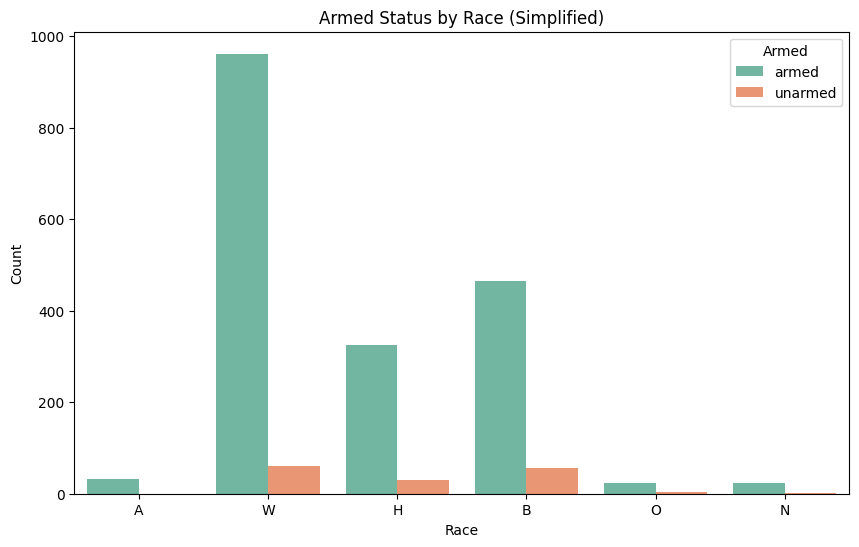

In [89]:
# Create a new column 'armed_category' based on 'armed' column
data_no_nulls['armed_category'] = data_no_nulls['armed'].apply(lambda x: 'unarmed' if x == 'unarmed' else 'armed')

plt.figure(figsize=(10, 6))
sns.countplot(x='race', hue='armed_category', data=data_no_nulls, palette='Set2')
plt.title('Armed Status by Race (Simplified)')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Armed', loc='upper right')
plt.show()

### 5.3 Race and flee

# Conclusions and suggestions for improvements

## Appendix

Information about 'race' population in US was taken from - https://usafacts.org/data/topics/people-society/population-and-demographics/population-data/population/.
Information about longitude and altitude information was taken from - https://simplemaps.com/data/us-cities.
Shape of the US map was taken from - https://hub.arcgis.com/datasets/1b02c87f62d24508970dc1a6df80c98e/explore?location=31.392059%2C-106.491703%2C4.00.